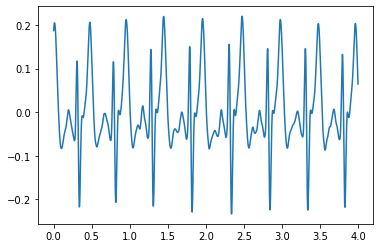

In [4]:
#### Part 1: Aliasing ####

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the ECG.csv file
ECG = pd.read_csv (r'ECG.csv')   #Enter .csv path here

# Original sampling frequency was 2000 Hz. Take the first 4 seconds of the ECG signal and plot.
# Create a time vector that is the same length as the ECG signal with a sampling frequency of 2000 Hz
fs = 2000 #sampling frequency in Hz
stepT = 1 /fs # time step
stopT = len(ECG) / fs # total time of ECG recording
time = np.arange(0,stopT,stepT) #time vector

# Plot recorded ECG Signal
plt.plot(time,ECG)


# Q1: Approximately how long was the recoding in seconds?

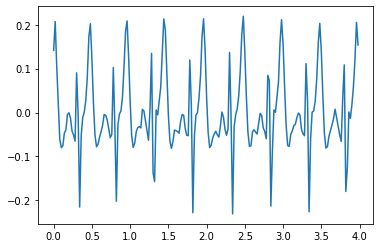

In [9]:
# The clinical bandwidth for an ECG signal is 0.05-100 Hz.

# Q2: Based on this, what is the minimum frequency we should sample an ECG signal at to get an accurate representation?

# Q3: This recording was sampled at 2000Hz. Is this frequency high enough for getting an accurate representation of the measured signal?


# Let's explore how undersampling the signal affects representation

from scipy import signal
# Say we sampled the signal at 200 Hz. Resample the ECG signal to 200 and plot
underSamp_ECG = signal.resample(ECG,200)
new_time = np.linspace(0, stopT, 200, endpoint=False)

# Plot undersampled ECG Signal
plt.plot(new_time,underSamp_ECG)

#Q4: Does this look like the original signal? Could we accurately calculate the individual's heartrate?

In [28]:
print(ECG)

      0.18565698
0       0.187158
1       0.188615
2       0.190025
3       0.191386
4       0.192697
...          ...
7994    0.075202
7995    0.072506
7996    0.069826
7997    0.067162
7998    0.064517

[7999 rows x 1 columns]


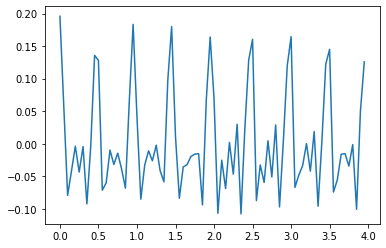

In [10]:
# Now we sampled the signal at 20 Hz. Resample the ECG signal to 20 Hz and plot
underSamp_ECG = signal.resample(ECG,80)
new_time = np.linspace(0, stopT, 80, endpoint=False)

# Plot undersampled ECG Signal
plt.plot(new_time,underSamp_ECG)

#Q5: Does this look like the original signal? Could we accurately calculate the individual's heartrate?

Text(0, 0.5, 'mV')

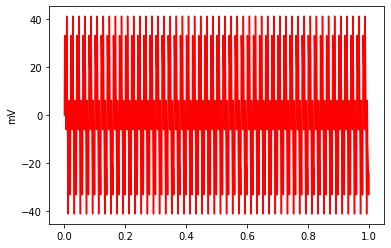

In [11]:
### Part 2: Time and Frequency Components ####

# You are recording a bundle of neurons that are firing at different rates. 
# 4 neurons are firing at 450 Hz, 10 at 300 Hz, 20 at 50 Hz, and 15 at 150 Hz
# Using sine waves, create the signal in time.
# The signal was sampled at 2000 Hz and the recording was 1 second

# Define recording parameters 
fs = 2000 #sampling frequency in Hz
ts = 1/fs # sampling interval
t = np.arange(0,1,ts) # time vector

# create signal
freq = 450
x = 4*np.sin(2*np.pi*freq*t)

freq = 300
x += 10*np.sin(2*np.pi*freq*t)

freq = 50
x += 20*np.sin(2*np.pi*freq*t)

freq = 150
x += 20*np.sin(2*np.pi*freq*t)

# Plot Signal in Time
plt.plot(t, x, 'r')
plt.ylabel('mV')

#Q6: From the plot, are you able to tell what frequencies the neurons are firing at?

(0.0, 1000.0)

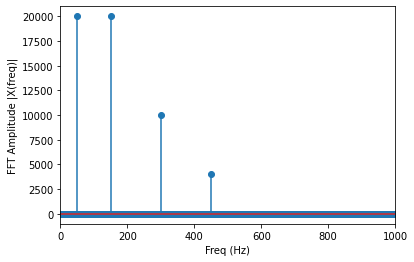

In [12]:
# Now lets convert the time signal into the frequency domain using fft. 

from numpy.fft import fft, ifft

# apply fft and plot against frequency
X = fft(x)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.stem(freq, np.abs(X))
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 1000)

#Q7: What frequencies are the neurons firing at? 


/Users/zaduk/opt/anaconda3/envs/eeg-notebooks/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'mV')

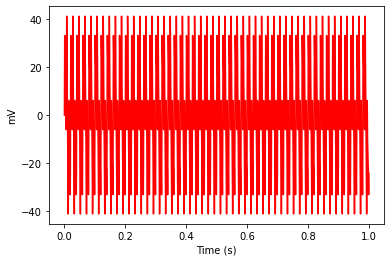

In [13]:
# Use the inverse fft() to convert the signal in the frequency back to the time domain
x = ifft(X)
plt.plot(t, x, 'r')
plt.xlabel('Time (s)')
plt.ylabel('mV')

# Q8: Does the signal look like its original form?

/Users/zaduk/opt/anaconda3/envs/eeg-notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.


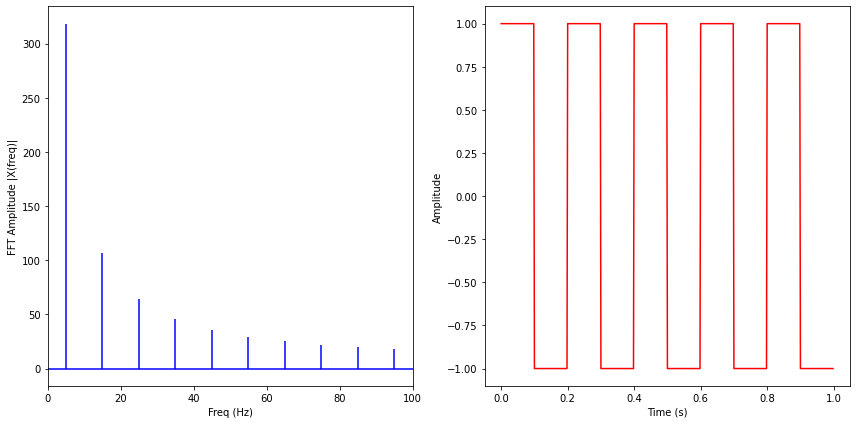

In [14]:
#### Part 3: Noise ####

# We are going to experiment with different forms of noise and see how it affects our signal in the time and frequency domains.

# Generate a 5 Hz square waveform sampled at 500 Hz for 1 second
from scipy import signal

import matplotlib.pyplot as plt

t = np.linspace(0, 1, 500, endpoint=False)
fs = 500
squareWave = signal.square(2 * np.pi * 5 * t)

# Plot the squarewave in the frequency and time domains 
X = fft(squareWave)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, squareWave, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Q9: What is the fundamental frequency of your signal? Why are there additional peaks?

/Users/zaduk/opt/anaconda3/envs/eeg-notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.


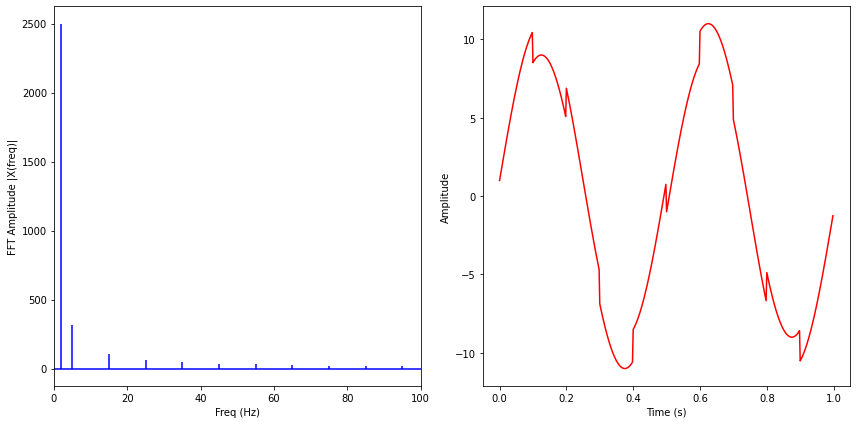

In [17]:
# Lets simulate the effect of phsyiological noise! Let's assume a person is breathing in and out (like a sine wave)
# They are breathing at a frequency of 2 Hz

# Using a sine wave, create a 1 second, 2 Hz respiration wave
freq = 2
amp = 10
resp = amp * np.sin(2*np.pi*freq*t)

# add this noise to your squarewave 
signal = squareWave + resp

# plot the result in time and frequency domains using the code below
X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, signal, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Q10: Increase the amplitude (amp= 1, 10) of your resp signal and plot. How does the noise distort your squarewave?

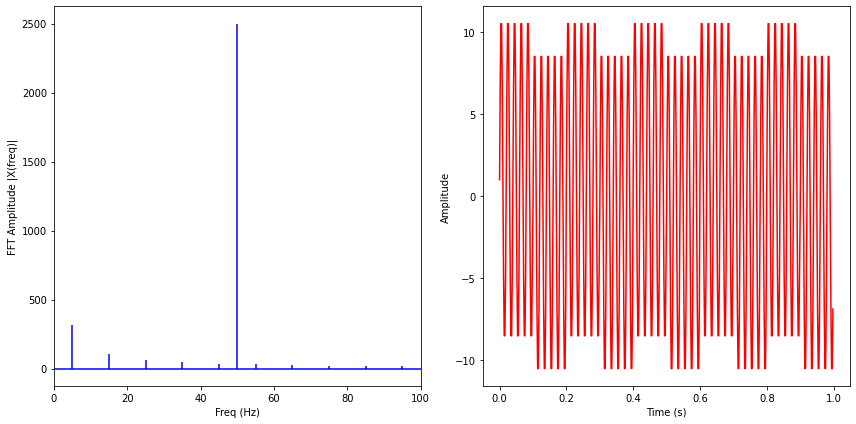

In [104]:
# Lets simulate the effect of Mains Hum! Let's assume we are collecting data in Japan where 
# the AC power supply fundamental frequency is 50 Hz. Generate a 50 Hz sine wave and add to your resp signal
# Change the noise amplitude and plot

freq = 50
amp = 10
mainsHum = amp * np.sin(2*np.pi*freq*t)

# add this noise to your squarewave 
signal = squareWave + mainsHum

# plot the result in time and frequency domains using the code below
X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, signal, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Q11: How does this affect your signal?

/Users/zaduk/opt/anaconda3/envs/eeg-notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.


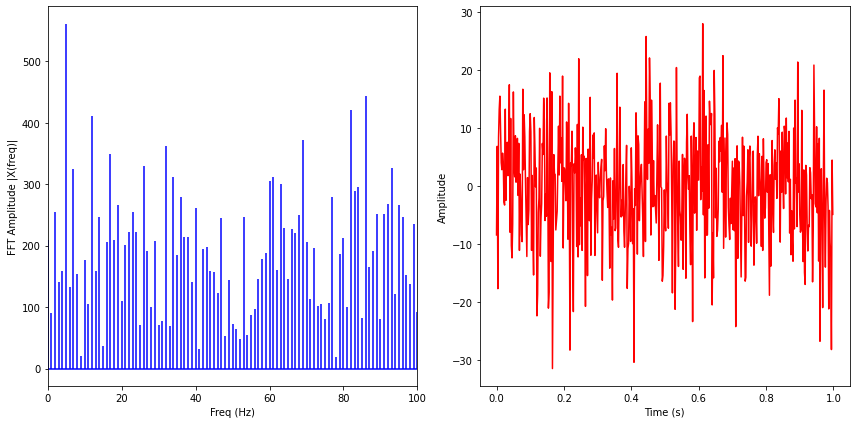

In [18]:
# Lets simulate the effect of white noise! Generate a random signal and add it to your square wave signal. 
# The white noise has a mean of 0 and standard deviation of 1
# Change the noise amplitude and plot

mu, sigma = 0, 1 # mean and standard deviation
amp = 10
whiteNoise = np.random.normal(mu, sigma, size=500)

# add this noise to your squarewave 
signal = squareWave + amp * whiteNoise

# plot the result in time and frequency domains using the code below
X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, signal, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# Q11: How does this affect your signal?

/Users/zaduk/opt/anaconda3/envs/eeg-notebooks/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.


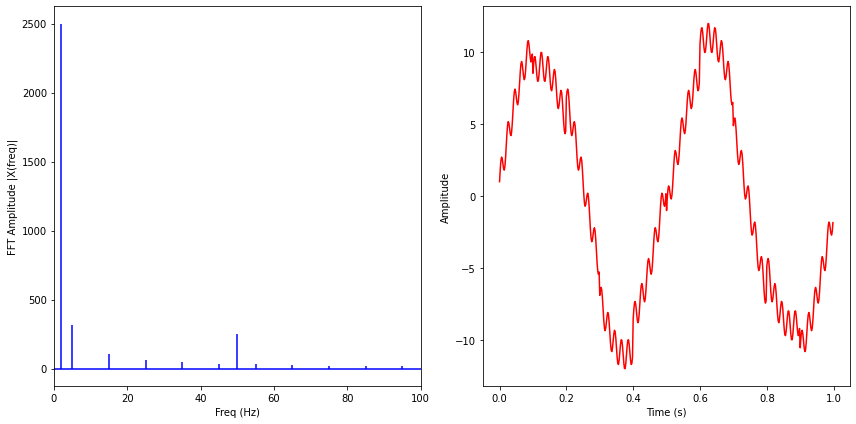

In [19]:
#### Part 4: Filtering ####
# Create a 20 Hz square waveform sampled at 500 Hz for 1 second

from scipy import signal

import matplotlib.pyplot as plt

t = np.linspace(0, 1, 500, endpoint=False)
fs = 500
squareWave = signal.square(2 * np.pi * 5 * t)

# Add the low frequency 2 Hz resp noise (amp=10) and 50 Hz mains hum (amp=1)
freq = 2
amp = 10
resp = amp * np.sin(2*np.pi*freq*t)

freq = 50
amp = 1
mainsHum = amp * np.sin(2*np.pi*freq*t)

signal = resp + mainsHum + squareWave

# Plot the noisy squarewave in the frequency and time domains 
X = fft(signal)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 100)

plt.subplot(122)
plt.plot(t, signal, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

In [25]:
!pip install scipy

In [ ]:
# Create a butterworth bandpass filter, order=2
#use appropriate cutoff frequencies (10 and 30 Hz) to remove the low- and high- frequency noises.
from scipy.signal import butter, lfilter

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 18
highcut = 22
order = 6

# Plot the frequency response of the filter
b, a = butter(lowcut, highcut, fs, order)
w, h = freqz(b, a, fs=fs, worN=2000)
plt.plot(w, abs(h), label="order = %d" % order)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')


(-0.0499, 1.0479, -0.049834837652600134, 0.049137679473390955)

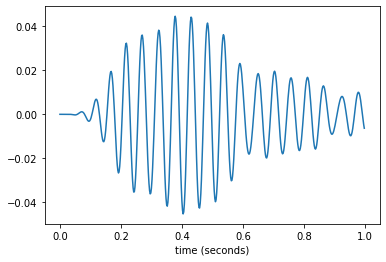

In [140]:
    # Filter a noisy signal
    y = lfilter(b, a, signal)
    t = np.linspace(0, 1, 500, endpoint=False)
    plt.plot(t, y)
    plt.xlabel('time (seconds)')
    plt.axis('tight')
    # Q12: Did the filter recreate the suqare wave? Why not?
    # Increase the order, Does this fix the issue?
    # Adjust your cutoff frequencies to be closer to 20. Does this fix the issue?